<a href="https://colab.research.google.com/github/Vrush17/ML-CA01/blob/main/CA1_machine_learning_and_pattern_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Business Understanding
Bibi
1. Ask chatGPT that you have this data and ask how to write the business understanding

  #In the business understanding phase of a machine learning project, the goal is to clearly define the problem the business is trying to solve and understand how machine learning can provide a solution. This phase identifies the key stakeholders, the business goals, and the value of predictions.For example, if you're building a machine learning model to predict crop yields, the business problem is to optimize agricultural productivity. The key stakeholders, such as farmers and agricultural planners, need accurate yield predictions to make better decisions about resource use (e.g., water, fertilizer) and crop management. Success is measured by how well the model helps improve yields, reduce costs, and increase operational efficiency.The business understanding phase ensures that the machine learning project is aligned with real-world business needs, providing a clear roadmap for data preparation, modeling, and deployment.



2. Share with me the result of GPT query and what u did
          
  #Predicting crop yield is crucial in agriculture for optimizing resources, reducing costs, and improving food security. Farmers, agricultural companies, and policymakers are the key stakeholders who rely on accurate crop predictions for planting strategies, efficient use of fertilizers and irrigation, and ensuring food supply chain stability. The business objective is to create a model that accurately predicts crop yield, ultimately benefiting stakeholders by improving decision-making and resource allocation.



The case at the Kaggle contains the table where the task is to predict crop yield depending on the quality of the soil, type of crop, temperature,  irrigation, and fertilization. The target group is formed by farmers and agricultural planners, who have to utilize these resources in order to maximize their efficiency of crop management and, therefore, increase crop yields. Apart from that, the project using a machine learning model aims for a higher level of prediction accuracy of the yield in terms of tons per hectare in specific areas. It would help to improve decision making, proper utilization of such facilities and increased production in the agricultural sector.


##Data Understanding

This dataset contains agricultural data for 1,000,000 samples aimed at predicting crop yield (in tons per hectare) based on various factors. The dataset can be used for regression tasks in machine learning, especially for predicting crop productivity.

* Region: The geographical region where the crop is grown (North, East, South, West).
* Soil_Type: The type of soil in which the crop is planted (Clay, Sandy, Loam, Silt, Peaty, Chalky).
* Crop: The type of crop grown (Wheat, Rice, Maize, Barley, Soybean, Cotton).
* Rainfall_mm: The amount of rainfall received in millimeters during the crop growth period.
* Temperature_Celsius: The average temperature during the crop growth period, measured in degrees Celsius.
* Fertilizer_Used: Indicates whether fertilizer was applied (True = Yes, False = No).
* Irrigation_Used: Indicates whether irrigation was used during the crop growth period (True = Yes, False = No).
* Weather_Condition: The predominant weather condition during the growing season (Sunny, Rainy, Cloudy).
* Days_to_Harvest: The number of days taken for the crop to be harvested after planting.
* Yield_tons_per_hectare: The total crop yield produced, measured in tons per hectare.

In [ ]:
# Import needed libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
import pandas as pd

#Load yield dataset
yield_df = pd.read_csv("crop_yield.csv")

print(f"The data contains {yield_df.shape[0]} rows and {yield_df.shape[1]} columns")

<ipython-input-4-b66c8f103b6c>:4: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  yield_df = pd.read_csv("crop_yield.csv")


The data contains 841926 rows and 10 columns


<ipython-input-5-73927aaba033>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Region', data=yield_df, palette='viridis')
<ipython-input-5-73927aaba033>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Soil_Type', data=yield_df, palette='magma')
<ipython-input-5-73927aaba033>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Crop', data=yield_df, palette='coolwarm')
<ipython-input-5-73927aaba033>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` varia

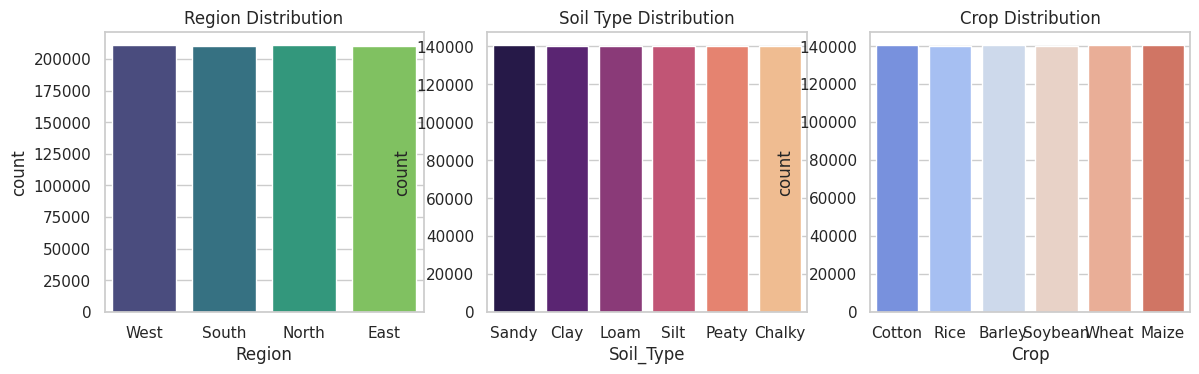

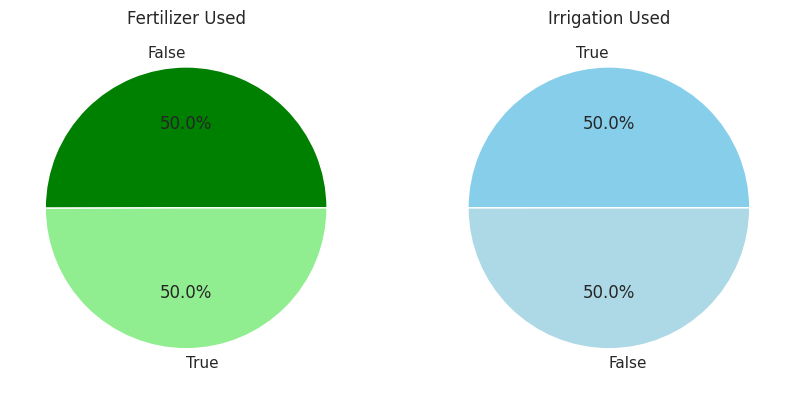

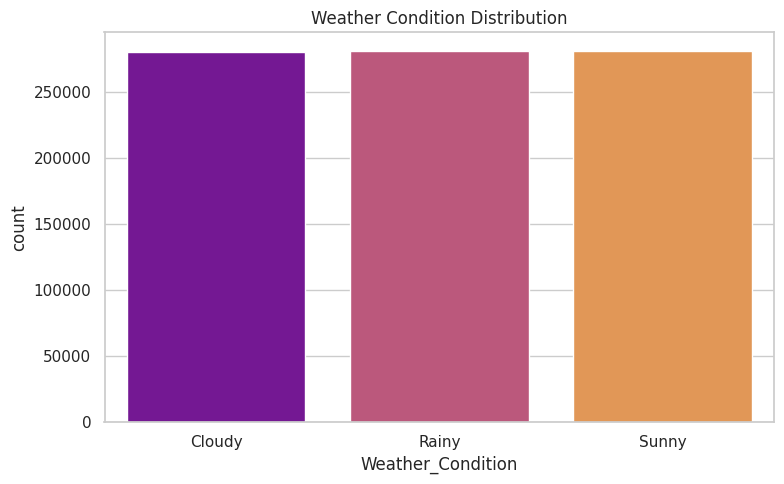

In [ ]:
## draw categorical data

# Set the plot style
sns.set(style='whitegrid')

# Visualize the categorical data using bar charts
plt.figure(figsize=(14, 8))

# Region distribution
plt.subplot(2, 3, 1)
sns.countplot(x='Region', data=yield_df, palette='viridis')
plt.title('Region Distribution');

# Soil Type distribution
plt.subplot(2, 3, 2)
sns.countplot(x='Soil_Type', data=yield_df, palette='magma')
plt.title('Soil Type Distribution');

# Crop distribution
plt.subplot(2, 3, 3)
sns.countplot(x='Crop', data=yield_df, palette='coolwarm')
plt.title('Crop Distribution');

# Fertilizer and Irrigation Usage (Pie Charts)
plt.figure(figsize=(10, 5))

# Fertilizer Used Pie Chart
plt.subplot(1, 2, 1)
fertilizer_counts = yield_df['Fertilizer_Used'].value_counts()
plt.pie(fertilizer_counts, labels=fertilizer_counts.index, autopct='%1.1f%%', colors=['green', 'lightgreen'])
plt.title('Fertilizer Used');

# Irrigation Used Pie Chart
plt.subplot(1, 2, 2)
irrigation_counts = yield_df['Irrigation_Used'].value_counts()
plt.pie(irrigation_counts, labels=irrigation_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightblue'])
plt.title('Irrigation Used');

# Weather Condition Bar Chart
plt.figure(figsize=(8, 5))
sns.countplot(x='Weather_Condition', data=yield_df, palette='plasma')
plt.title('Weather Condition Distribution');

# Display all plots
plt.tight_layout()
plt.show();


From the previous visualizations we can notice the following
- The uniform distributions across regions, soil types, crops, and Weather_Condition suggest that the dataset is well-balanced, which is ideal for building unbiased models for prediction or analysis.
- The near-equal use of fertilizer and irrigation allows for a fair comparison of their impact on crop yields.

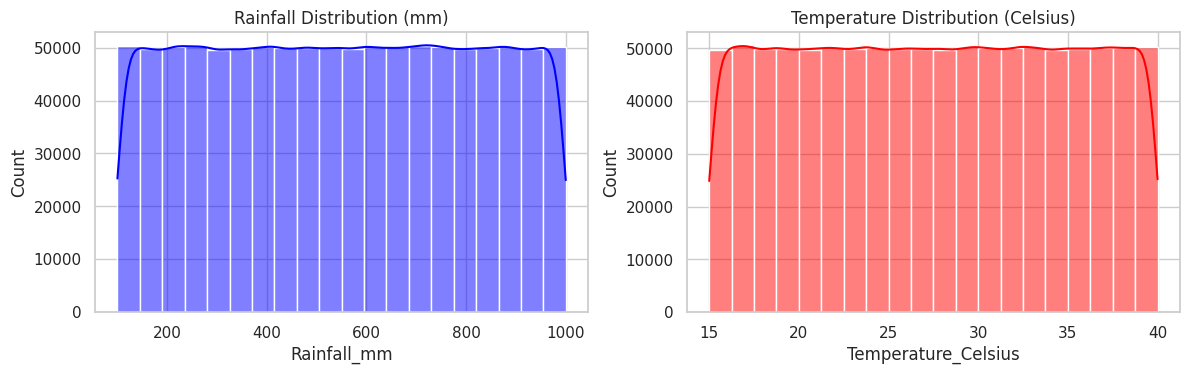

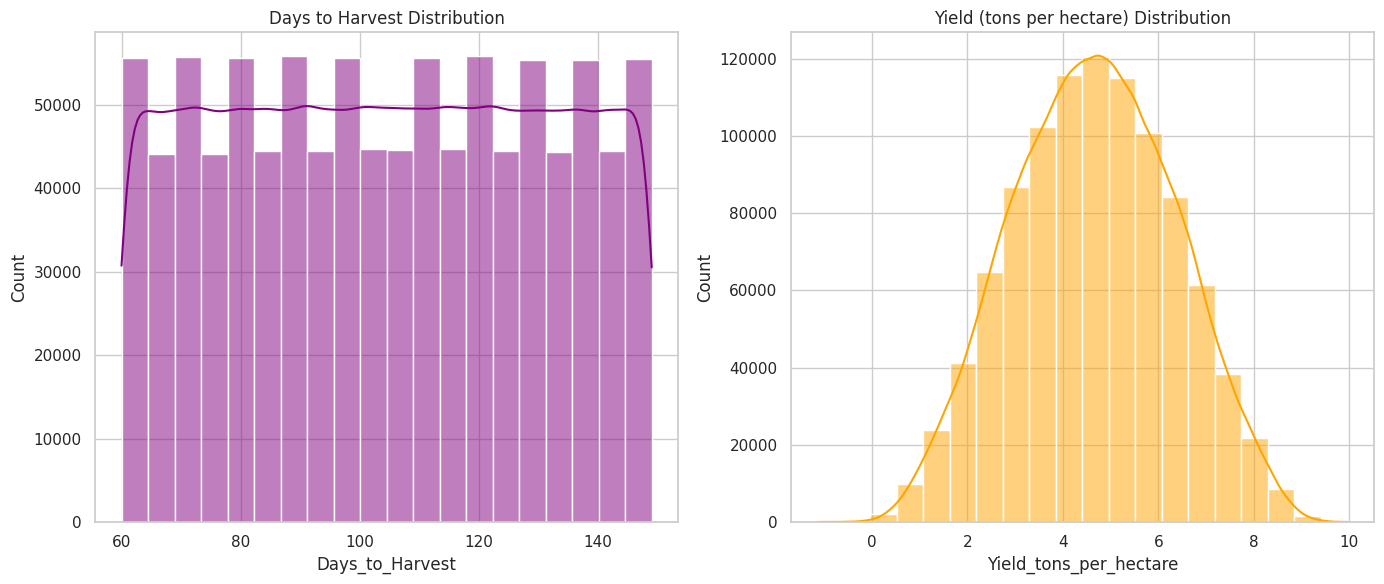

In [ ]:
# Rainfall and Temperature Histograms
plt.figure(figsize=(14, 8))

# Rainfall distribution
plt.subplot(2, 2, 1)
sns.histplot(yield_df['Rainfall_mm'], bins=20, kde=True, color='blue')
plt.title('Rainfall Distribution (mm)')

# Temperature distribution
plt.subplot(2, 2, 2)
sns.histplot(yield_df['Temperature_Celsius'], bins=20, kde=True, color='red')
plt.title('Temperature Distribution (Celsius)')


# Days to Harvest and Yield Histograms
plt.figure(figsize=(14, 6))

# Days to Harvest Histogram
plt.subplot(1, 2, 1)
sns.histplot(yield_df['Days_to_Harvest'], bins=20, kde=True, color='purple')
plt.title('Days to Harvest Distribution')

# Yield tons per hectare Histogram
plt.subplot(1, 2, 2)
sns.histplot(yield_df['Yield_tons_per_hectare'], bins=20, kde=True, color='orange')
plt.title('Yield (tons per hectare) Distribution')

# Display all plots
plt.tight_layout()
plt.show();

The previous distributions suggest a balanced dataset that includes a wide variety of climatic conditions, crop cycles, and yields, making it well-suited for modeling predictions related to yield based on environmental factors.

## Data Preparation

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [ ]:
#Load yield dataset
yield_df = pd.read_csv("crop_yield.csv")
print(yield_df)

       Region Soil_Type     Crop  Rainfall_mm  Temperature_Celsius  \
0        West     Sandy   Cotton   897.077239            27.676966   
1       South      Clay     Rice   992.673282            18.026142   
2       North      Loam   Barley   147.998025            29.794042   
3       North     Sandy  Soybean   986.866331            16.644190   
4       South      Silt    Wheat   730.379174            31.620687   
...       ...       ...      ...          ...                  ...   
999995   West      Silt     Rice   302.805345            27.987428   
999996  South    Chalky   Barley   932.991383            39.661039   
999997  North     Peaty   Cotton   867.362046            24.370042   
999998   West      Silt    Wheat   492.812857            33.045505   
999999   West     Sandy    Maize   180.936180            27.298847   

        Fertilizer_Used  Irrigation_Used Weather_Condition  Days_to_Harvest  \
0                 False             True            Cloudy              122   
1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Bibi
# Handle missing values
# TODO: Check the shape of data before and after dropna
# TODO: Remove the duplicate
#The data does not contain any duplicate or na
# TODO: Ask chatgpt how to make sure the preprocessing step done

# Check the missing value and shape of the data before and after dropna
print("Before dropna:", yield_df.shape)
yield_df_cleaned = yield_df.dropna()
print("After dropna:", yield_df_cleaned.shape)




In [ ]:
yield_df_cleaned.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251


In [ ]:
# Creating instance of one-hot-encoder
# Vru
# TODO: Search on ChatGPT give the problem, and try to get a solution and understand it


#encoder = OneHotEncoder(handle_unknown='ignore')
#yield_df_encoded=encoder.fit_transform(yield_df_cleaned[['Fertilizer_Used','Irrigation_Used','Weather_Condition','Region','Soil_Type','Crop']])
#yield_ecoded_df = pd.DataFrame(yield_df_encoded.toarray())
#yield_ecoded_df.columns
#taking only columns

from sklearn.preprocessing import OneHotEncoder
#import pandas as pd

# Create an instance of OneHotEncoder
#encoder = OneHotEncoder(handle_unknown='ignore')

# Fit and transform the data using OneHotEncoder
#yield_df_encoded = encoder.fit_transform(yield_df_cleaned[['Fertilizer_Used', 'Irrigation_Used', 'Weather_Condition', 'Region', 'Soil_Type', 'Crop']])

# Convert the sparse matrix to a dense DataFrame using toarray()
# yield_encoded_df = pd.DataFrame(yield_df_encoded.toarray())

# Assign column names using the encoder's feature names
# yield_encoded_df.columns = encoder.get_feature_names_out(['Fertilizer_Used', 'Irrigation_Used', 'Weather_Condition', 'Region', 'Soil_Type', 'Crop'])

# Display the encoded DataFrame
#yield_encoded_df.columns


from sklearn.preprocessing import OneHotEncoder

# Columns to be one-hot encoded (categorical columns)
categorical_cols = ['Region', 'Soil_Type', 'Crop', 'Weather_Condition','Fertilizer_Used', 'Irrigation_Used']

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' to avoid multicollinearity

# Fit and transform the categorical columns
yield_df_encoded = encoder.fit_transform(yield_df_cleaned[categorical_cols])

# Convert the encoded data to a DataFrame
encoded_df = pd.DataFrame(yield_df_encoded, columns=encoder.get_feature_names_out(categorical_cols))

# Concatenate the encoded columns with the scaled dataset (excluding the original categorical columns)
yield_final_data = pd.concat([yield_df_cleaned.drop(categorical_cols, axis=1), encoded_df], axis=1)

# Display the first few rows of the final dataset
yield_final_data.head()



NameError: name 'yield_df_cleaned' is not defined

In [ ]:
# Shirin
#applying standard scalar

yield_final_data.head()
# Selecting only the numerical columns for scaling
numerical_cols = ['Rainfall_mm', 'Temperature_Celsius', 'Days_to_Harvest']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical columns
yield_df_scaled = yield_final_data.copy()
yield_df_scaled[numerical_cols] = scaler.fit_transform(yield_df_scaled[numerical_cols])

# Display the first few rows of the scaled dataset
yield_df_scaled.head()

NameError: name 'yield_final_data' is not defined

In [ ]:
yield_df.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251


In [ ]:
# Heba: Add what you did to the data
# Heba: Add data understanding in the data
# Connect everyday at 5:00 --> will be tommorrow at 6:30

yield_df_scaled.to_csv("yield_df_cleaned.csv", index=False)

In [ ]:
# Three models
# Two models (SVM - Regression - Decision Tree)